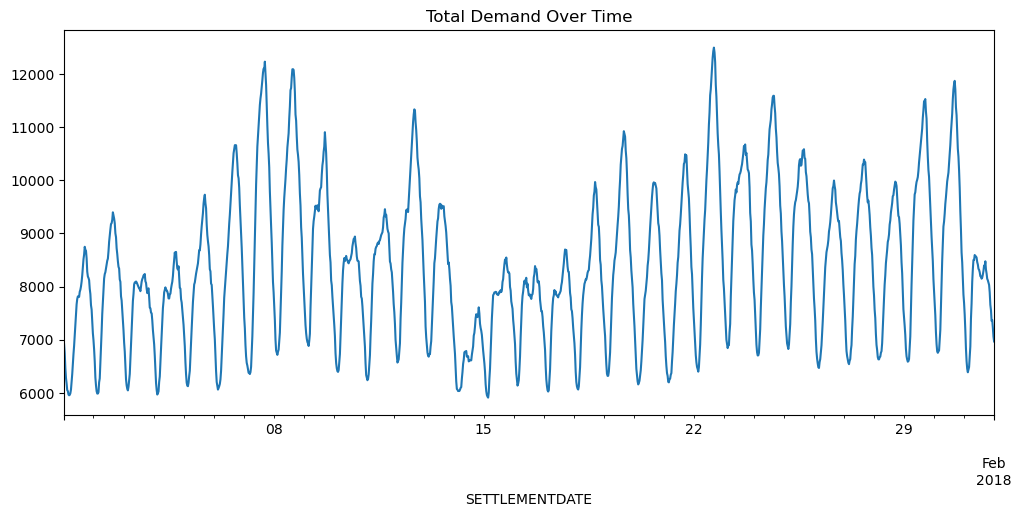

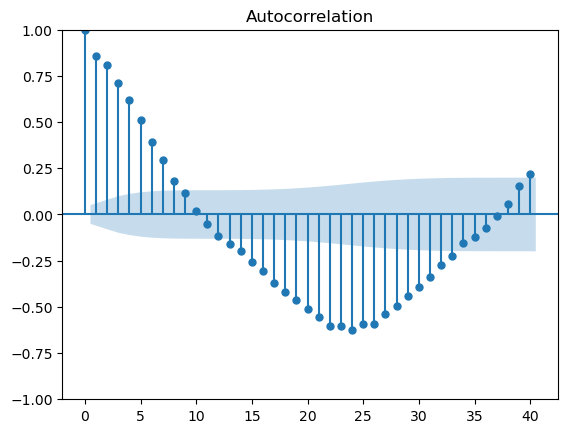

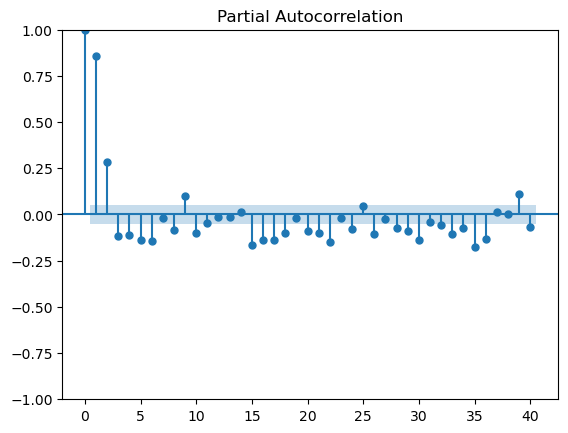

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30min will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30min will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30min will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            TOTALDEMAND   No. Observations:                 1488
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8896.529
Date:                Tue, 22 Apr 2025   AIC                          17799.058
Time:                        14:15:08   BIC                          17814.971
Sample:                    01-01-2018   HQIC                         17804.989
                         - 02-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9169      0.013     72.160      0.000       0.892       0.942
ma.L1         -0.2295      0.029     -7.829      0.000      -0.287      -0.172
sigma2      9170.5686    294.836     31.104      0.0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data
df = pd.read_csv('PRICE_AND_DEMAND_201801_NSW1.csv')
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'], format='%Y/%m/%d %H:%M:%S')
df.set_index('SETTLEMENTDATE', inplace=True)

# Plot the original series
df['TOTALDEMAND'].plot(figsize=(12, 5), title='Total Demand Over Time')
plt.show()

# Differencing the data
demand_diff = df['TOTALDEMAND'].diff().dropna()

# Plot ACF and PACF
plot_acf(demand_diff, lags=40)
plt.show()
plot_pacf(demand_diff, lags=40)
plt.show()

# Fit ARIMA model (adjust p, d, q based on ACF/PACF)
model = ARIMA(df['TOTALDEMAND'], order=(1,1,1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=24)  # forecast next 24 time steps
print("Forecasted values:")
print(forecast)
